In [41]:
import utilities as ut
import construction as cs
import singleDatasetAnalysis as san
import multipleDatasetAnalysis as man
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Node MAXclique time

In [42]:
# load data
data_in = cs.load_data("data/co-presence/LH10.dat")
meta = "data/co-presence/metadata/metadata_LH10.dat"

print(len(data_in))

# compute colors
meta_dict = load_metadata(meta)
dict_colors = compute_colors(meta_dict)

150126
DIPARTMENTS:  ['Admin' 'Etude' 'Med' 'Paramed' 'Patient']


# Find a GAP

In [43]:
data = data_in
gaps = [19,100,500,1000,5000,10000,20000]

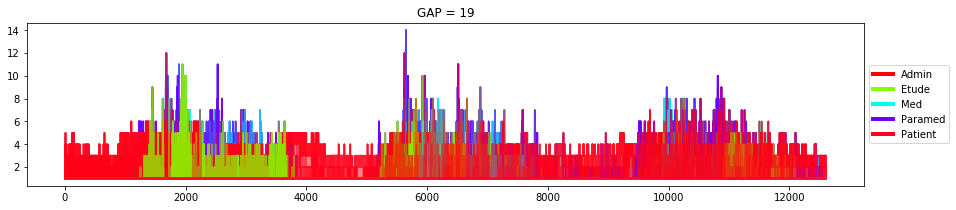

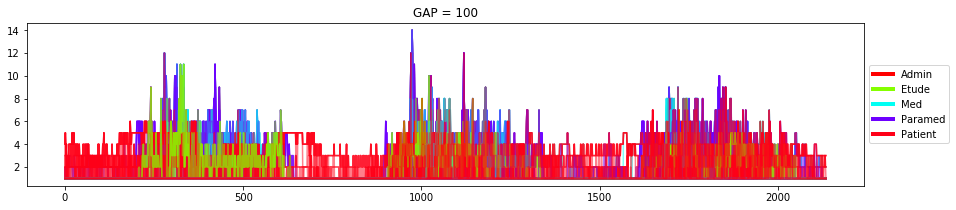

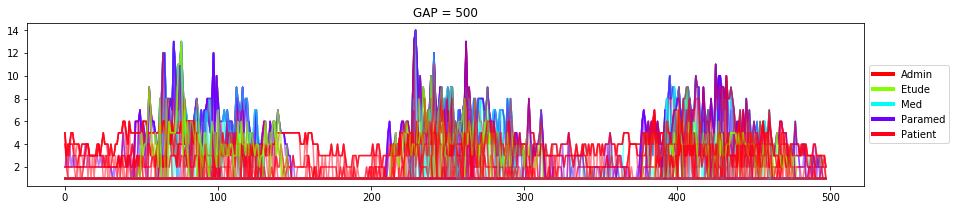

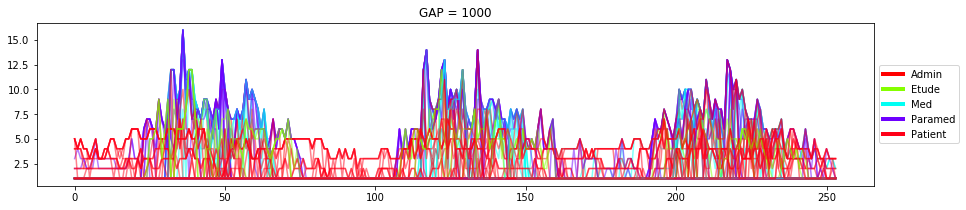

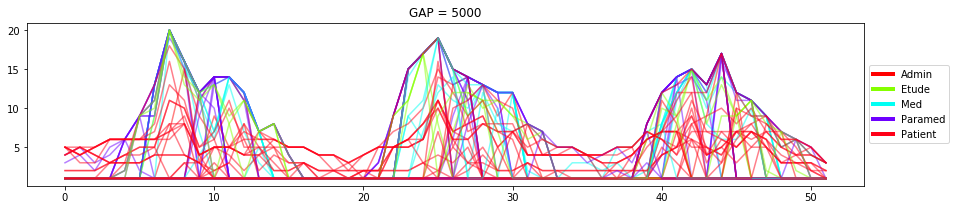

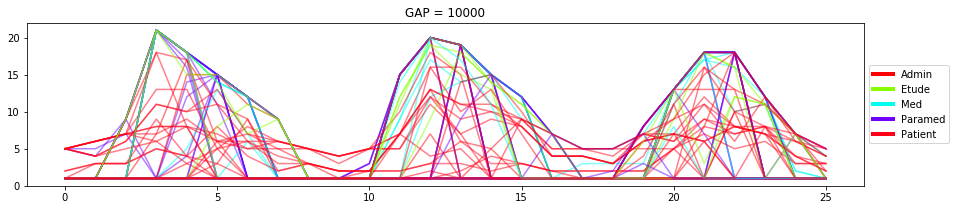

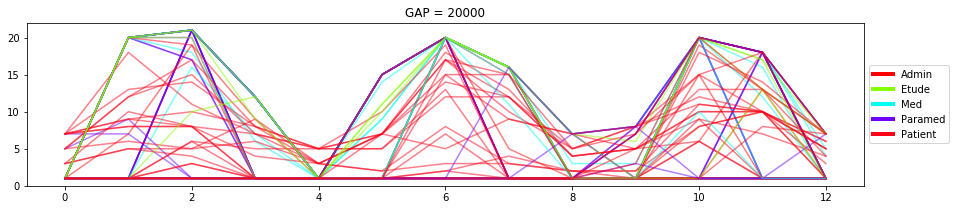

In [44]:
for gap in gaps:
    dict_cliques = node_MAXclique_time(data,gap=gap)
    plot_node_behaviour(dict_cliques,
                        meta_dict,
                        dict_colors,
                        title = "GAP = "+str(gap),
                        figsize=(15,3),
                        alpha=0.5,
                        save=None)

### GAP = 5000 
##### circa uguale a 1 ora e 15 min

In [45]:
data = data_in
dict_cliques = node_MAXclique_time(data,gap=5000)

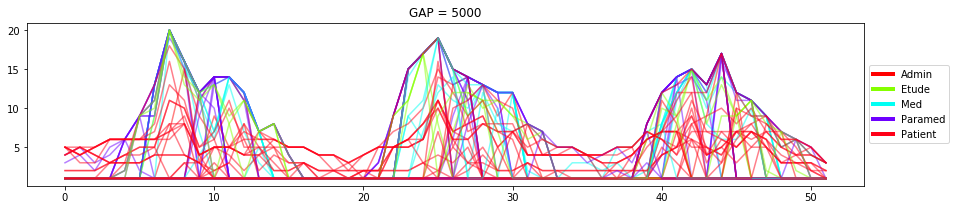

In [46]:
plot_node_behaviour(dict_cliques,
                    meta_dict,
                    dict_colors,
                    figsize=(15,3),
                    alpha=0.5,
                    title ="GAP = 5000",
                    save=None)

### Media Dipartimenti

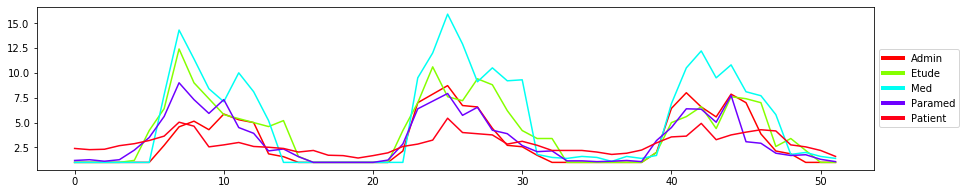

In [47]:
avg_degree = departments_average(dict_cliques,meta_dict)
plot_node_behaviour_avg(avg_degree,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None)

### Singoli Dipartimenti

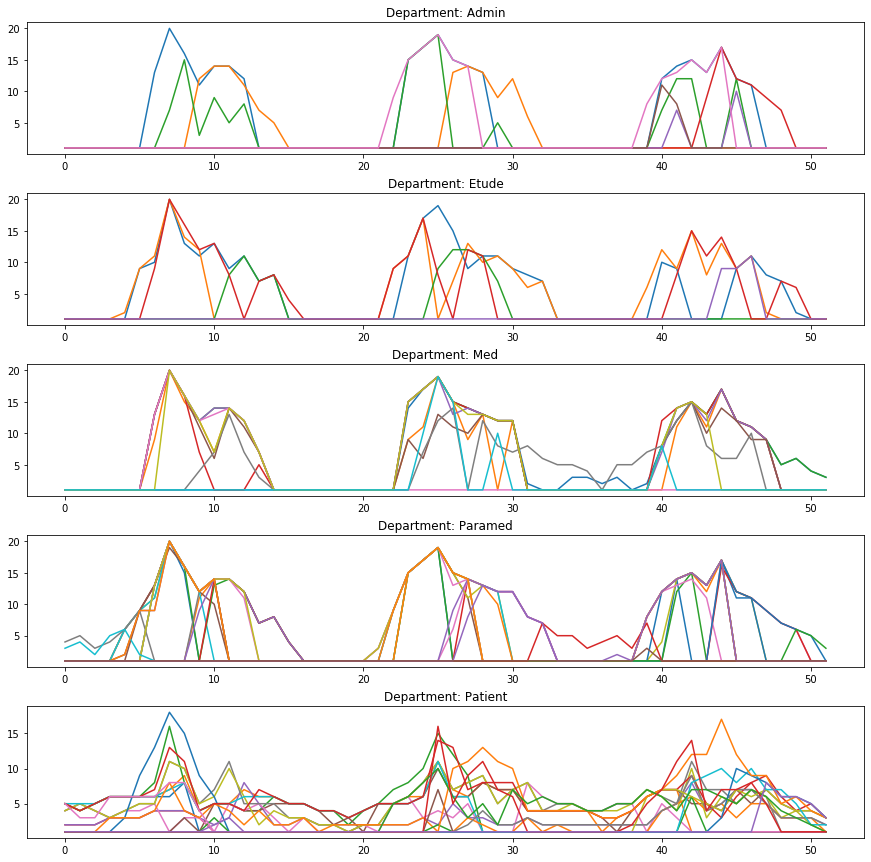

In [48]:
plot_node_behaviour_unique_department(dict_cliques,
                                        meta_dict,
                                        dict_colors,
                                        figsize=(15,3),
                                        alpha=0.5,
                                        save=None)

# COMPARAZIONE MEDIE CLIQUE E DEGREE

CLIQUE gap = 5000


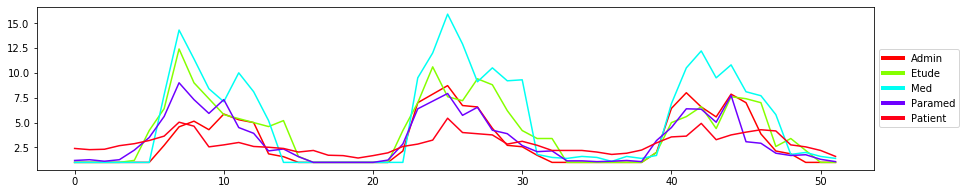

DEGREE gap = 5000
# of graphs 52
# of nodes 73


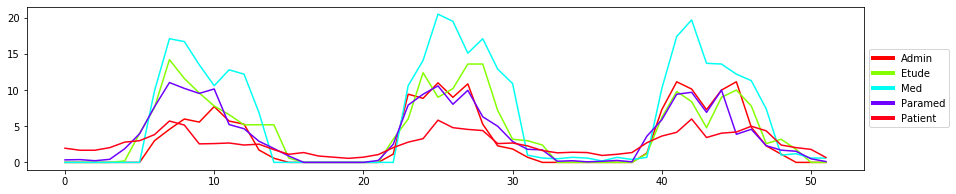

In [54]:
print("CLIQUE gap = 5000")
avg_cliques = departments_average(dict_cliques,meta_dict)
plot_node_behaviour_avg(avg_cliques,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None)
print("DEGREE gap = 5000")
dict_degrees = node_degrees_times(data,gap=5000)
avg_degree = departments_average(dict_degrees,meta_dict)
plot_node_behaviour_avg(avg_degree,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None)

In [40]:
def load_metadata(path):
    '''
    Input METADATA PATH
    Output dictionary {node_ID : "Dipartment",...}
    '''
    fp = open(path, 'r')
    meta_dict = dict()
    for line in fp.readlines():
        meta_dict[int(line.split("\t")[0])] = line.split("\t")[1][0:-1]

    fp.close()  
    print("DIPARTMENTS: ",np.unique(list(meta_dict.values())))
    return(meta_dict)

def compute_colors(meta_dict):
    '''
    Input metadata dictionary {node_ID : "Dipartment",...}
    Output colors dictionary {"Dipartment": "color"}
    '''
    departments = np.unique(list(meta_dict.values()))
    colors = get_cmap(len(departments))
    dict_colors = dict()
    for i in range(len(departments)):
        dict_colors[departments[i]] = colors(i)
        
        
    return(dict_colors)


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


def node_degrees_times(data,gap):
    '''
    Input: loaded file, and GAP
    Output: dict_degree a dictionary {node_id : [degree t0,degree t1, degree_t2 ..]....}
    '''

    graphs, pos = cs.build_graphs(data,gap)
    print("# of graphs",len(graphs))

    nodes = cs.individuals(data)
    print("# of nodes",len(nodes))
    dict_degrees = dict() # inizialize dictionary {node_id : []}
    for n in nodes:
        dict_degrees[n] = []

    # fill dictionary
    for g in graphs:
        for n in g.nodes():
            degree = nx.degree(g,n)
            dict_degrees[n].append(degree)
        
    return(dict_degrees)


def node_MAXclique_time(data,gap):
    graphs, pos = cs.build_graphs(data,gap=gap)
    nodes = cs.individuals(data)
    cliqes_dict = dict()
    for n in nodes:
        cliqes_dict[n] = []

    for g in graphs:
        for n in g.nodes():
            cliques = nx.cliques_containing_node(g,n)
            maximum = 0
            for clique in cliques:
                if len(clique)>maximum:
                    maximum = len(clique)
            cliqes_dict[n].append(maximum)
    return(cliqes_dict)



from matplotlib.lines import Line2D



def plot_node_behaviour_unique_department(dictionary,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None):
    departmens = np.unique(list(meta_dict.values()))
    
    plt.figure(figsize=(15,3*len(departmens)))
    j = 1
    for dip in departmens:
        plt.subplot(len(departmens),1,j)
        j = j + 1
        keys = list(dictionary.keys())
        
        for i in keys:
            degrees = dictionary[i]
            if (meta_dict[i]==dip):
                plt.plot((degrees))
        plt.title("Department: "+dip)
        
    
    plt.subplots_adjust(hspace=0.3)
    if (save):
        name = "results/"+save+"_"+dip+".pdf"
        plt.savefig(name)
    plt.show()

def plot_node_behaviour(dictionary,meta_dict,dict_colors,figsize=(15,3),title=None,alpha=0.5,save=None):
    keys = list(dictionary.keys())
    plt.figure(figsize=figsize)
    for i in keys:
        degrees = dictionary[i]
        plt.plot((degrees),alpha=alpha,color = dict_colors[meta_dict[i]])

    # build legend
    custom_legend = []
    custom_departmenst = []
    for i in np.unique(list(meta_dict.values())):
        custom_departmenst.append(i)
        custom_legend.append(Line2D([0], [0], color=dict_colors[i], lw=4))

    plt.legend(custom_legend, np.unique(list(meta_dict.values())),loc='center left', bbox_to_anchor=(1, 0.5))
    if (save):
        name = str(save)+".pdf"
        plt.savefig(name)
    if (title):
        plt.title(title)
    plt.show()

    
    
    
    
def plot_node_behaviour_avg(dictionary,meta_dict,dict_colors,figsize=(15,3),alpha=0.5,save=None):
    keys = list(dictionary.keys())
    plt.figure(figsize=(15,3))
    for i in keys:
        degrees = dictionary[i]
        plt.plot((degrees),alpha=1,color = dict_colors[i])

    # build legend
    custom_legend = []
    custom_departmenst = []
    for i in np.unique(list(meta_dict.values())):
        custom_departmenst.append(i)
        custom_legend.append(Line2D([0], [0], color=dict_colors[i], lw=4))

    plt.legend(custom_legend, np.unique(list(meta_dict.values())),loc='center left', bbox_to_anchor=(1, 0.5))
    if (save):
        name = str(save)+".pdf"
        plt.savefig(name)
    plt.show()

#### compute the average of a dictionary 
def departments_average(dictionary,meta_dict):
    departments = np.unique(list(meta_dict.values()))

    # initialize average clique dictionary
    dict_avg = dict()
    for i in departments:
        dict_avg[i] = []

    # crate dict avg
    # dict_avg {Dipartmend : [[(Node1) t1,t2,t3..][(Node1) t1,t2,t3..]...]...}
    for i in dictionary: 
        dict_avg[meta_dict[i]].append(dictionary[i])
        
    # comute the average
    for i in departments:
        tmp = dict_avg[i]
        dict_avg[i] = np.mean(tmp,0)
    
    return(dict_avg)

In [1]:
def get_number_conected_components(graphs):
    count = 0

    sg = list(nx.connected_component_subgraphs(graphs))
    sub_graphs = []

    for i in sg:
        if not(len(i)==1):
            count = count + 1
                
    return(count)
def get_conncted_components(data,gap):
    graphs,pos = cs.build_graphs(data,
                   gap = gap)
    
    array_of_subgraphs = []
    
    for g in graphs:
        sg = list(nx.connected_component_subgraphs(g))
        sub_graphs = []

        for i in sg:
            if not(len(i)==1):
                sub_graphs.append(i)
                
        array_of_subgraphs.append(sub_graphs)
        
    return(array_of_subgraphs)